<a href="https://colab.research.google.com/github/ahmeddtarekk7769/Data_Science/blob/main/comparing_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  - Logistic Regression, K-NN & Naive Bayes Classifier



The US adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. Each row is labelled as either having a salary greater than ">50K" or "<=50K".

The goal here is to train the logistic regression, K-NN & Naive Bayes classifiers on the training dataset to predict the column `income_bracket` which has two possible values ">50K" and "<=50K" and compare the accuracy of each classifier with the test dataset.

Note that the dataset is made up of categorical and continuous features. It also contains missing values
The categorical columns are: `workclass, education, marital_status, occupation, relationship, race, gender, native_country`

The continuous columns are: `age, education_num, capital_gain, capital_loss, hours_per_week`

**Dataset columns**

```
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

income-bracket: <=50k, >50k
```

*Note: for the purposes of this exercise, fnlwgt (final weight, a value assigned by the census bureau as part of their sampling methodology of census data across the 51 states) can be dropped for simplicity*

**In this exercise we are going to use `%timeit` magic command to compare the runtime of the different algorithms together. We are going to use it once while building the model and once while scoring the model**

The `%timeit` magic command is used measure the execution time of a piece of code. In order to use it, write the command just before the relevant of code, in the same line to measure the execution time.

It returns the mean and standard deviation of code run time calculated over `r` number of runs and `n` number of loops within each run (*it may return different results for each time you run the cell*).

<br/>
<br/>

Timeit Function: [Official Python Documentation - timeit function](https://docs.python.org/3/library/timeit.html)

%timeit Magic Command - Ipython: [ipython - timeit magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

Extra Links on %timeit Magic Command: [nkme - timeit magic command](https://note.nkmk.me/en/python-timeit-measure)

**Example**

In [ ]:
%timeit [num for num in range(20)]

576 ns ± 161 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In the above example, the list comprehension was evaluated for 7 runs with each run having 1 million loops (default behaviour). This took an average of 2.05 microseconds with a standard deviation of 31.8 nanoseconds (*it may return different results for each time you run the cell*).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn-v0_8")
#when using colab
# Set the style for plots using the updated seaborn style
#plt.style.use("seaborn-v0_8") # Changed from 'seaborn' to 'seaborn-v0_8'

In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Dataset Loading & Cleaning

**Dataset Loading**

Make sure the datasets have been loaded correctly. You may want to have a look at the [pd.read_csv documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to resolve dataset loading issues.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/main/data/census_income.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Check the unique values for each categorical attribute**

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


**Handle inconsistencies and missing values**

In [ ]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [ ]:
df[df['workclass'] == '?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48682,61,?,265201,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,14,United-States,<=50K.
48769,21,?,212661,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,?,144872,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,Canada,<=50K.
48812,81,?,26711,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K.


In [ ]:
df['workclass'] = df['workclass'].replace('?', np.nan)

In [ ]:
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [ ]:
df['education'].value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [ ]:
df['education_num'].isnull().sum()

np.int64(0)

In [ ]:
df['education_num'].describe()

,education_num
count,48842.000000
mean,10.078089
std,2.570973
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


In [ ]:
df['education_num'].value_counts()

,count
education_num,
9,15784
10,10878
13,8025
14,2657
11,2061
7,1812
12,1601
6,1389
4,955


In [ ]:
df['education_num'].isnull().sum()

np.int64(0)

In [ ]:
df['marital_status'].value_counts()

,count
marital_status,
Married-civ-spouse,22379
Never-married,16117
Divorced,6633
Separated,1530
Widowed,1518
Married-spouse-absent,628
Married-AF-spouse,37


In [ ]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
?,2809
Transport-moving,2355


In [ ]:
df['occupation'] = df['occupation'].replace('?', np.nan)

In [ ]:
df['occupation'].value_counts()

,count
occupation,
Prof-specialty,6172
Craft-repair,6112
Exec-managerial,6086
Adm-clerical,5611
Sales,5504
Other-service,4923
Machine-op-inspct,3022
Transport-moving,2355
Handlers-cleaners,2072


In [ ]:
df['relationship'].value_counts()

,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


In [ ]:
df['race'].value_counts()

,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


In [ ]:
df['sex'].value_counts()

,count
sex,
Male,32650
Female,16192


In [ ]:

df['capital_gain'].isnull().sum()

np.int64(0)

In [ ]:
df['capital_loss'].isnull().sum()

np.int64(0)

In [ ]:
df['hours_per_week'].isnull().sum()

np.int64(0)

In [ ]:
df['capital_gain'].describe()

,capital_gain
count,48842.000000
mean,1079.067626
std,7452.019058
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,99999.000000


In [ ]:
pd.to_numeric(df['capital_loss'], errors='coerce').isna().sum()

np.int64(0)

In [ ]:
df['native_country'].value_counts()

,count
native_country,
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


In [ ]:
df['native_country'] = df['native_country'].replace('?', np.nan)

In [ ]:
df['income_bracket'].value_counts()

,count
income_bracket,
<=50K,24720
<=50K.,12435
>50K,7841
>50K.,3846


In [ ]:
df['income_bracket'] = df['income_bracket'].str.replace('.', '', regex=False)

In [ ]:
df['income_bracket'].value_counts()

,count
income_bracket,
<=50K,37155
>50K,11687


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


For the sake of simplicty, we won't be using the fnlwgt attribute

**Drop the `fnlwgt` attribute from the dataset**

In [ ]:
df = df.drop('fnlwgt', axis=1)

## Exploratory Data Analysis

**Q: Does education have an impact on a person's income bracket?**

*Hint: see lab 6 for an example of plotting a categorical attribute against a binary attribute.*

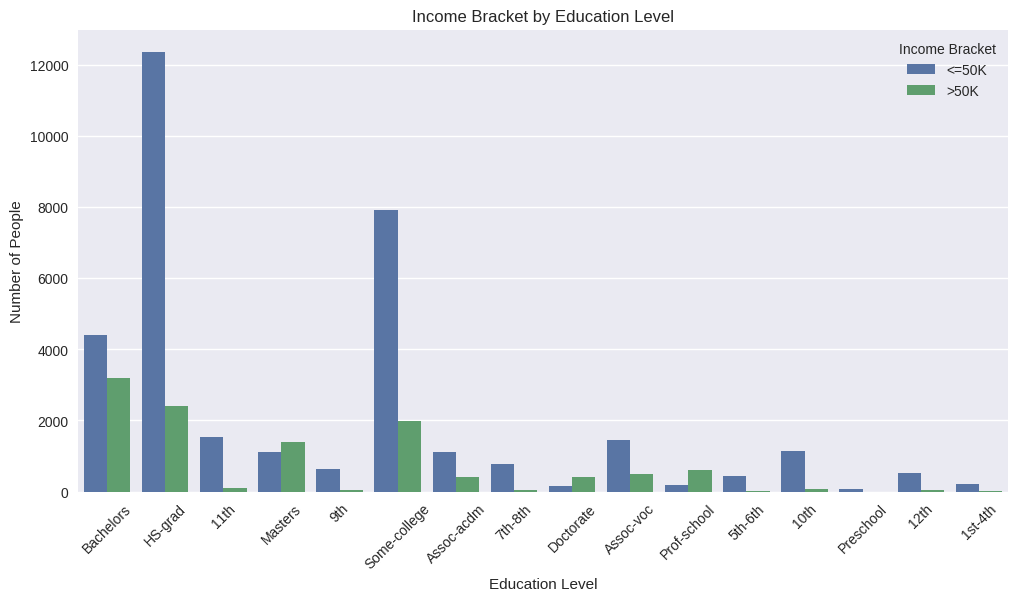

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='education', hue='income_bracket')
plt.xticks(rotation=45)
plt.title("Income Bracket by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of People")
plt.legend(title='Income Bracket')
plt.show()

## Data Preprocessing

**Encode the categorical columns using an appropriate strategy**

In [ ]:
df = df.drop('education', axis=1)

In [ ]:
df['income_bracket'] = df['income_bracket'].apply(lambda x: 1 if x == '>50K' else 0)

In [ ]:
df['income_bracket'].value_counts()


,count
income_bracket,
0,34014
1,11208


In [ ]:
df.head(10)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])

In [ ]:
df['workclass'].value_counts()

,count
workclass,
2,33307
4,3796
1,3100
5,1946
3,1646
0,1406
6,21


In [ ]:
le_occ = LabelEncoder()
df['occupation'] = le_occ.fit_transform(df['occupation'])

In [ ]:
df['occupation'].value_counts()

,count
occupation,
2,6020
9,6008
3,5984
0,5540
11,5408
7,4808
6,2970
13,2316
5,2046


In [ ]:
le_country = LabelEncoder()
df['native_country'] = le_country.fit_transform(df['native_country'])

In [ ]:
df['native_country'].value_counts()

,count
native_country,
38,41292
25,903
29,283
10,193
32,175
1,163
7,147
18,147
4,133


**Apply Normalization on the numerical Columns**

In [ ]:
numerical_cols = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
print(df.dtypes)

age                int64
workclass          int64
education_num      int64
marital_status    object
occupation         int64
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country     int64
income_bracket     int64
dtype: object


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,0.301370,5,0.800000,Never-married,0,Not-in-family,White,Male,0.02174,0.0,0.397959,38,0
1,0.452055,4,0.800000,Married-civ-spouse,3,Husband,White,Male,0.00000,0.0,0.122449,38,0
2,0.287671,2,0.533333,Divorced,5,Not-in-family,White,Male,0.00000,0.0,0.397959,38,0
3,0.493151,2,0.400000,Married-civ-spouse,5,Husband,Black,Male,0.00000,0.0,0.397959,38,0
4,0.150685,2,0.800000,Married-civ-spouse,9,Wife,Black,Female,0.00000,0.0,0.397959,4,0


In [ ]:
df = df.drop(['marital_status', 'relationship', 'race', 'sex'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('income_bracket', axis=1)
y = df['income_bracket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

**Split the data into training and testing sets, and then train the Logistic Regression, K-NN, and Naive Bayes Classifiers on the training set** (Use %timeit when building the model)

[Scikit-learn API Reference](https://scikit-learn.org/stable/modules/classes.html)

**Use the `timeit` magic command.**

The `timeit` magic command is used to measure the execution time for the small python code snippets. This command runs the code a million times (by default) to get the most precise value for the code execution time​.

It returns the mean and standard deviation of code run time calculated over `r` number of runs and `n` number of loops within each run (*it may return different results for each time you run the cell*).

**Please note that, for this dataset you need to set the `max_iter` attribute of logistic regression to at least `2000` so that the model will be able converge, meaning that it could find a local optimal solution.**

Logistic regression fails to converge with this dataset if we run it for too few iterations. It could also be that the dataset is not linearly separable. Since this is a linear model, validation techinques like the ones used in lab 5 can be used.The logistic regression model is an iterative algorithm that is fitted in multiple iterations. It might not converge properly if the input variables are not normalized properly. In this case, it needs more iterations to be able to converge and find a solution.

So, you can set `max_iter` attribute of logistic regression to a larger value. The default is `1000`. This should be your last resort. So, if the algorithm does not converge within the first 1000 iterations, you need to set the `max_iter` to a larger value.


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=2000)

In [ ]:
%timeit lr_model.fit(X_train, y_train)

471 ms ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
%timeit knn_model.fit(X_train, y_train)

42.8 ms ± 765 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
%timeit nb_model.fit(X_train, y_train)

9.04 ms ± 1.27 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Evaluation

**Evaluate each model using their built-in `score` function to get them evaluated based on the `accuracy` metric**

**Use `%timeit` when scoring the model**

In [ ]:
lr_model.score(X_test, y_test)

0.8099063905063758

In [ ]:
%timeit lr_model.score(X_test, y_test)

3.94 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
knn_model.score(X_test, y_test)

0.7942802388147712

In [ ]:
%timeit knn_model.score(X_test, y_test)

1.02 s ± 277 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
nb_model.score(X_test, y_test)

0.7910370752561362

In [ ]:
%timeit nb_model.score(X_test, y_test)

5.55 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## References

Dataset source: https://archive.ics.uci.edu/ml/datasets/census+income